In [28]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
pd.set_option('display.max_columns', 100)
train = pd.read_csv('../input/train2.csv')
test = pd.read_csv('../input/test2.csv')

df = pd.concat([train.drop('price', axis = 1),test], axis = 0)

- sqft_living : 주거공간
- sqft_lot : 부지의 평방 피트
- sqft_above : 지하실 제외
- sqft_basement : 지하실

- sqft_living15 : 2015년 기준 주거 공간의 평방 피트(면적, 집을 재건축했다면, 변화가 있을 수 있음)
- sqft_lot15 : 2015년 기준 부지의 평방 피트(면적, 집을 재건축했다면, 변화가 있을 수 있음)

# sqft_living_new
sqft_living15 - sqft_living : 얼마나 변했는지
# sqft_lot_new
sqft_lot15 - sqft_lot

In [30]:
train['sqft_living_new'] = train.sqft_living15 - train.sqft_living
train['sqft_lot_new'] = train.sqft_lot15 - train.sqft_lot

In [31]:
test['sqft_living_new'] = test.sqft_living15 - test.sqft_living
test['sqft_lot_new'] = test.sqft_lot15 - test.sqft_lot

# sqft_living_per_lot
부지당 주거공간

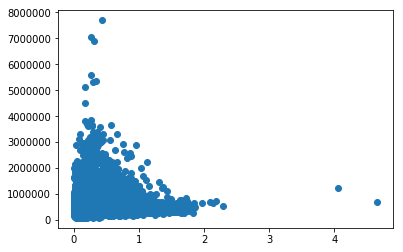

In [32]:
train['sqft_living_per_lot'] = train['sqft_living'] / train['sqft_lot']
test['sqft_living_per_lot'] = test['sqft_living'] / test['sqft_lot']

plt.scatter(train.sqft_living_per_lot, train.price)

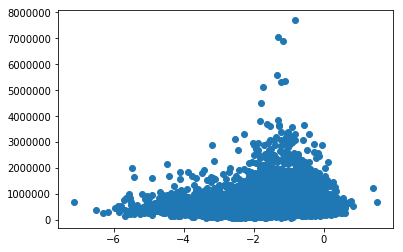

In [33]:
train['sqft_living_per_lot_log'] = np.log(train['sqft_living_per_lot'])
test['sqft_living_per_lot_log'] = np.log(test['sqft_living_per_lot'])

plt.scatter(train.sqft_living_per_lot_log, train.price)

# sqft_living_per_lot_15
15 부지당 주거공간

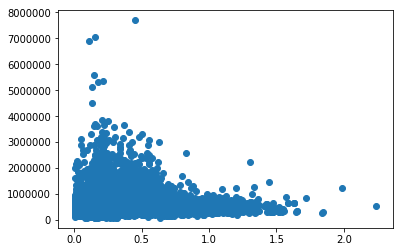

In [34]:
train['sqft_living_per_lot15'] = train['sqft_living15'] / train['sqft_lot15']
test['sqft_living_per_lot15'] = test['sqft_living15'] / test['sqft_lot15']

plt.scatter(train.sqft_living_per_lot15, train.price)

In [35]:
print(train.sqft_living_per_lot15.min())
print(test.sqft_living_per_lot15.min())

0.001449333270371487
0.0030123266793721237


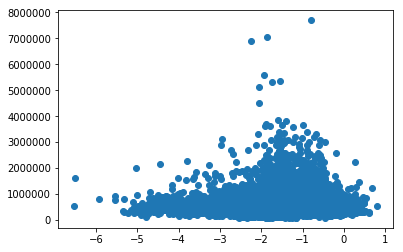

In [36]:
train['sqft_living_per_lot15_log'] = np.log(train['sqft_living_per_lot15'])
test['sqft_living_per_lot15_log'] = np.log(test['sqft_living_per_lot15'])

plt.scatter(train.sqft_living_per_lot15_log, train.price)

- living = sqft_above + sqft_basement

In [39]:
sum(train['sqft_living'] == train['sqft_above'] + train['sqft_basement']) / len(train)

1.0

# sqft_above_per_living
sqft_above/ sqft_living

In [46]:
train['sqft_above_per_living'] = train['sqft_above'] / train['sqft_living']
test['sqft_above_per_living'] = test['sqft_above'] / test['sqft_living']

In [47]:
#train.to_csv('train_sqft.csv', index = False)
#test.to_csv('test_sqft.csv', index = False)